In [1]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings

In [2]:
warnings.filterwarnings("ignore")

df=pd.read_csv("crop_production.csv")
df.head(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100.0
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.0,15.0
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,40.0,169.0


In [3]:
df.shape 

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [4]:
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [5]:
df.State_Name.nunique()

33

In [6]:
df.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [7]:
df.Season.unique() ##Total no of season 

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [8]:
df.Crop.nunique()


124

In [9]:

df["Season"] = df["Season"].str.rstrip()
df["State_Name"] = df["State_Name"].str.rstrip()
df["Crop"] = df["Crop"].str.rstrip() 
df["District_Name"] = df["District_Name"].str.rstrip() 
df.Season.unique()

array(['Kharif', 'Whole Year', 'Autumn', 'Rabi', 'Summer', 'Winter'],
      dtype=object)

In [10]:

print(df.Crop_Year.nunique())
print(df.Crop_Year.unique())

19
[2000 2001 2002 2003 2004 2005 2006 2010 1997 1998 1999 2007 2008 2009
 2011 2012 2013 2014 2015]


In [11]:
df.District_Name.nunique()
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [12]:
df['Production'] = df['Production'].replace(0, np.nan)
df['Production']=df['Production'].fillna(df.groupby('Crop')['Production'].transform('mean'))
df.isnull().sum() 

State_Name         0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Area               0
Production       663
dtype: int64

In [13]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [14]:
Crop_Prod = df.groupby('Crop')['Production'].sum().reset_index().sort_values(by='Production',ascending=False)
Crop_Prod.tail(20) 

,Crop,Production
115,Turnip,484.0
121,other fibres,0.0
120,Yam,0.0
118,Water Melon,0.0
11,Beet Root,0.0
12,Ber,0.0
4,Ash Gourd,0.0
84,Plums,0.0
104,Snak Guard,0.0
94,Ribed Guard,0.0


In [15]:

df.dropna(subset=["Production"],axis=0,inplace=True) 
df.isnull().sum() 
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245428 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     245428 non-null  object 
 1   District_Name  245428 non-null  object 
 2   Crop_Year      245428 non-null  int64  
 3   Season         245428 non-null  object 
 4   Crop           245428 non-null  object 
 5   Area           245428 non-null  float64
 6   Production     245428 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 15.0+ MB


In [16]:
df.District_Name.value_counts() 

BIJAPUR      945
TUMKUR       936
BELGAUM      925
HASSAN       895
BELLARY      887
            ... 
HYDERABAD      8
KHUNTI         6
RAMGARH        6
NAMSAI         1
MUMBAI         1
Name: District_Name, Length: 646, dtype: int64

In [17]:
raindata=pd.read_csv("rainfall.csv")
raindata.head()

,SUBDIVISION,YEAR,Parameter,ANNUAL
0,ANDAMAN & NICOBAR ISLANDS,1901,Mean,2911.0
1,ANDAMAN & NICOBAR ISLANDS,1901,Standard deviation,395.9
2,ANDAMAN & NICOBAR ISLANDS,1901,Coefficient of variation,13.6
3,ANDAMAN & NICOBAR ISLANDS,1901,Actual,3373.2
4,ANDAMAN & NICOBAR ISLANDS,1901,Percentage departure,15.9


In [18]:

raindata["YEAR"].unique()
raindata.isnull().sum()

print(raindata.columns)

Index(['SUBDIVISION', 'YEAR', 'Parameter', 'ANNUAL'], dtype='object')


In [19]:
raindata.rename(columns={"SUBDIVISION":"State_Name","YEAR":"Crop_Year","ANNUAL":"Rainfall"},inplace = True)
print(raindata.columns)
print(raindata.State_Name.unique())
print(df.State_Name.unique())

raindata["State_Name"].replace({'ARUNACHAL PRADESH':'Arunachal Pradesh',
                    'ORISSA':'Odisha', 'JHARKHAND': 'Jharkhand','BIHAR':'Bihar',
                    'UTTARAKHAND':'Uttarakhand',  'PUNJAB':'Punjab','HIMACHAL PRADESH':'Himachal Pradesh',
                    'JAMMU & KASHMIR':'Jammu and Kashmir', 'CHHATTISGARH':'Chhattisgarh', 'TELANGANA':'Telangana',
                    'TAMIL NADU':"Tamil Nadu", 'KERALA':'Kerala','ANDAMAN & NICOBAR ISLANDS': 'Andaman and Nicobar Islands',
                    'ASSAM':'Assam','MEGHALAYA':'Meghalaya', 'HARYANA ':'Haryana', 'CHANDIGARH':'Chandigarh',
                    'NAGALAND':'Nagaland', 'MANIPUR':'Manipur', 'MIZORAM ':'Mizoram', 'TRIPURA':'Tripura', 
                    'PUDUCHERRY':'Puducherry', 'UTTAR PRADESH': 'Uttar Pradesh', 'RAJASTHAN':'Rajasthan',
                    'MADHYAPRADESH':'Madhya Pradesh','SIKKIM':'Sikkim', 'GUJARAT':'Gujarat', 'GOA': 'Goa',
                    'ANDHRA PRADESH':'Andhra Pradesh', 'KARNATAKA':'Karnataka', 'WEST BENGAL':'West Bengal',
                    'MAHARASHTRA':'Maharashtra','DADRA NAGAR HAVELI':'Dadra and Nagar Haveli'}, inplace=True)
raindata.State_Name.unique()

set(raindata.State_Name)==set(df.State_Name)
raindata=raindata[raindata.State_Name!="LAKSHADWEEP"]
set(raindata.State_Name)==set(df.State_Name)
raindata.tail(10)


Index(['State_Name', 'Crop_Year', 'Parameter', 'Rainfall'], dtype='object')
['ANDAMAN & NICOBAR ISLANDS' 'ARUNACHAL PRADESH' 'ASSAM & MEGHALAYA'
 'BIHAR' 'CHHATTISGARH' 'COASTAL ANDHRA PRADESH' 'COASTAL KARNATAKA'
 'EAST MADHYA PRADESH' 'EAST RAJASTHAN' 'EAST UTTAR PRADESH'
 'GANGETIC WEST BENGAL' 'GUJARAT REGION' 'HARYANA DELHI & CHANDIGARH'
 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND' 'KERALA' 'KONKAN & GOA'
 'LAKSHADWEEP' 'MADHYA MAHARASHTRA' 'MATATHWADA' 'NAGA MANI MIZO TRIPURA'
 'NORTH INTERIOR KARNATAKA' 'ORISSA' 'PUNJAB' 'RAYALSEEMA'
 'SAURASHTRA & KUTCH' 'SOUTH INTERIOR KARNATAKA'
 'SUB HIMALAYAN WEST BENGAL & SIKKIM' 'TAMIL NADU' 'TELANGANA'
 'UTTARAKHAND' 'VIDARBHA' 'WEST MADHYA PRADESH' 'WEST RAJASTHAN'
 'WEST UTTAR PRADESH']
['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir'
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pr

,State_Name,Crop_Year,Parameter,Rainfall
12446,WEST UTTAR PRADESH,2012,No. of districts,NaN
12447,WEST UTTAR PRADESH,2013,Actual,932.8
12448,WEST UTTAR PRADESH,2013,Percentage departure,11.6
12449,WEST UTTAR PRADESH,2013,No. of districts,NaN
12450,WEST UTTAR PRADESH,2014,Actual,486.9
12451,WEST UTTAR PRADESH,2014,Percentage departure,-41.8
12452,WEST UTTAR PRADESH,2014,No. of districts,NaN
12453,WEST UTTAR PRADESH,2015,Actual,582.7
12454,WEST UTTAR PRADESH,2015,Percentage departure,-30.3
12455,WEST UTTAR PRADESH,2015,No. of districts,NaN


In [20]:
print(df.head)
print(raindata.head())

print(df.dtypes)
print(raindata.dtypes)

df = pd.merge(df, raindata)
df.head()

df=df[["State_Name","District_Name","Crop_Year","Season","Area","Rainfall","Crop","Production"]]
df.head()

<bound method NDFrame.head of                          State_Name District_Name  Crop_Year      Season  \
0       Andaman and Nicobar Islands      NICOBARS       2000      Kharif   
1       Andaman and Nicobar Islands      NICOBARS       2000      Kharif   
2       Andaman and Nicobar Islands      NICOBARS       2000      Kharif   
3       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year   
4       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year   
...                             ...           ...        ...         ...   
246086                  West Bengal       PURULIA       2014      Summer   
246087                  West Bengal       PURULIA       2014      Summer   
246088                  West Bengal       PURULIA       2014  Whole Year   
246089                  West Bengal       PURULIA       2014      Winter   
246090                  West Bengal       PURULIA       2014      Winter   

                       Crop      Area  Production  
0    

,State_Name,District_Name,Crop_Year,Season,Area,Rainfall,Crop,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,1254.0,2763.2,Arecanut,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,1254.0,-5.1,Arecanut,2000.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,1254.0,NaN,Arecanut,2000.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,2.0,2763.2,Other Kharif pulses,1.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,2.0,-5.1,Other Kharif pulses,1.0


2002    18015
2003    17805
2004    15825
2007    15273
2005    15000
2000    14859
2013    14328
2008    14316
2006    13875
2001    13608
2011    13386
2009    12345
2010    12258
1999    11823
2014    11469
2012    11283
1998    10437
1997     9351
2015     1581
Name: Crop_Year, dtype: int64
Rice                 18351
Maize                15501
Moong(Green Gram)    11583
Urad                 10368
Sesamum               9360
Sugarcane             8250
Wheat                 8133
Groundnut             7956
Rapeseed &Mustard     7536
Potato                7425
Name: Crop, dtype: int64


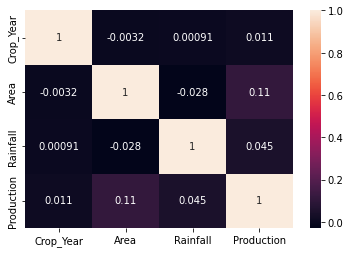

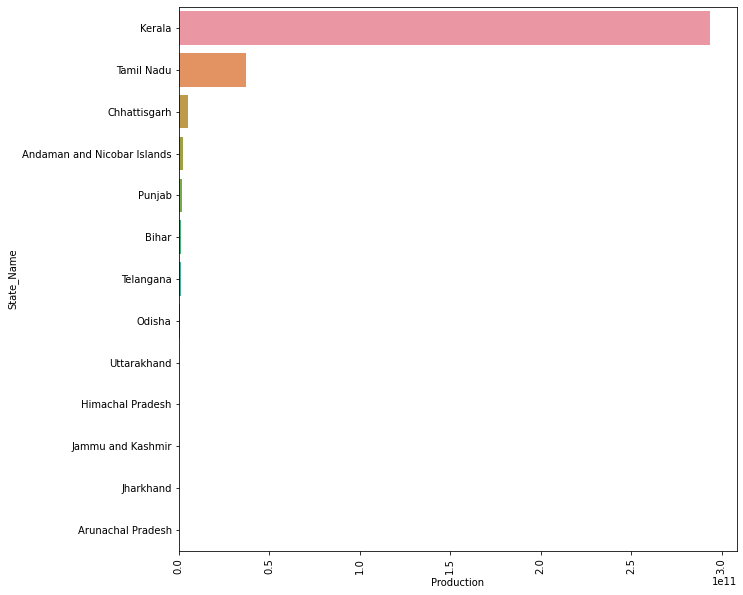

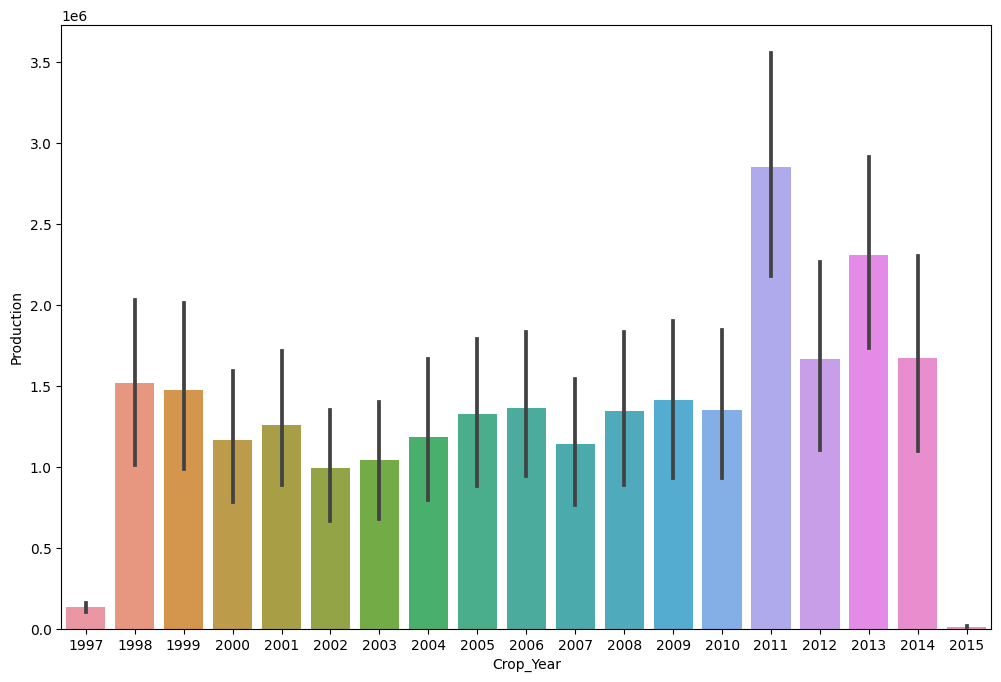

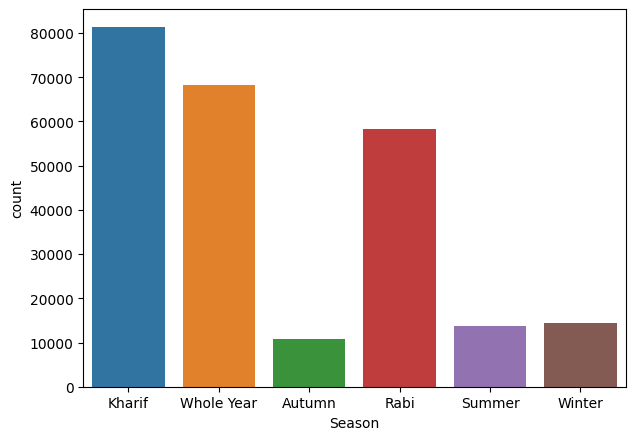

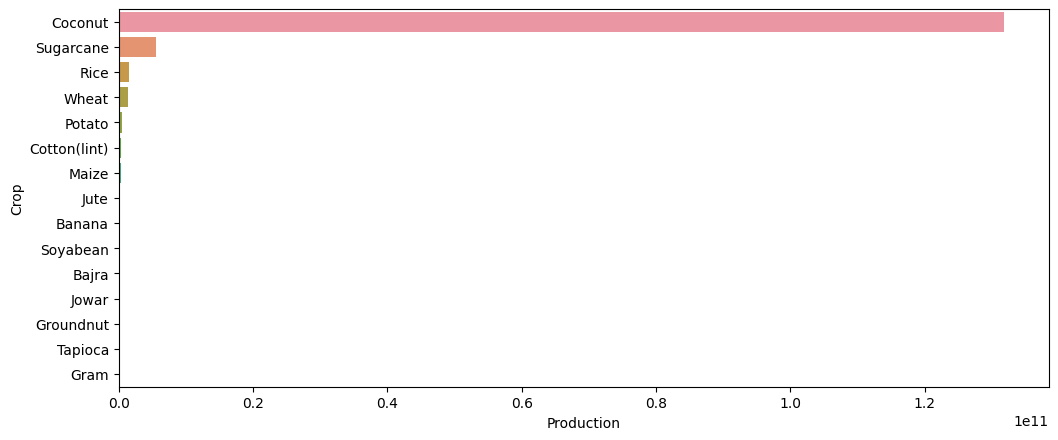

In [21]:

df.describe()
sns.heatmap(df.corr(),annot=True)
df.State_Name.value_counts().head(15)  
state_prod = df.groupby('State_Name')['Production'].sum().reset_index().sort_values(by='Production',ascending=False)
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.barplot(data=state_prod, y= "State_Name",x="Production")

state_prod.head(5) # Top 5 states with most production over the years
state_prod.tail(5) # Top 5 states with least production over the years
print(df.Crop_Year.value_counts())  ## count of data in each year

plt.figure(figsize=(12,8),dpi=100)
sns.barplot(data=df,x='Crop_Year',y='Production');
prod_year= df.groupby(['State_Name','Crop_Year'])['Production'].sum().reset_index().sort_values(by='Production',ascending=False)
prod_year.head(10)  # Top states with most production in a year
prod_year.tail(10)
plt.figure(figsize=(7,5),dpi=100)
sns.countplot(data=df,x='Season');
print(df.Crop.value_counts().head(10))
plt.figure(figsize=(12,5),dpi=100)
sns.barplot(data=Crop_Prod.head(15),x='Production',y='Crop')

Crop_Prod.tail(10)  # worst performing crops
coconut_df = df[df['Crop'] == 'Coconut']


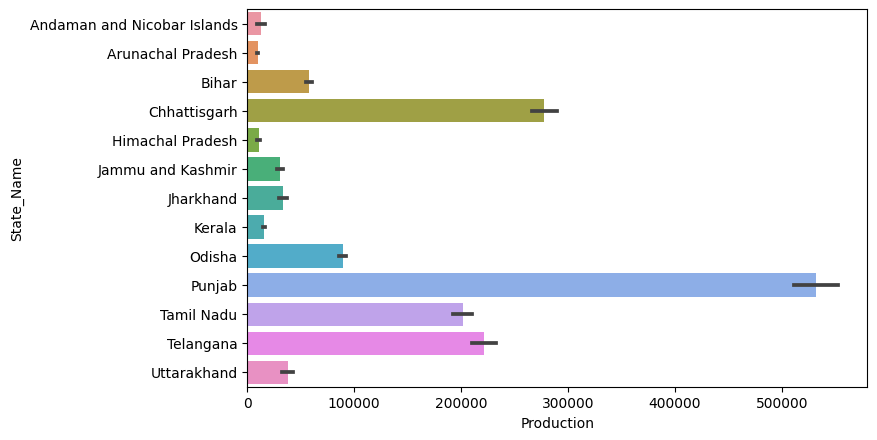

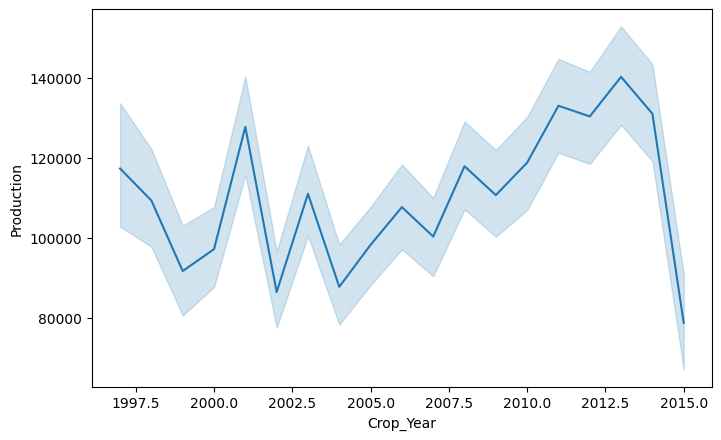

In [22]:
rice_df=df[df['Crop']=='Rice']
# Average Coconut production in states
plt.figure(figsize=(8,5),dpi=100)
#sns.barplot(data=coconut_df,x='Production',y='State_Name');
sns.barplot(data=rice_df,x='Production',y='State_Name')

#coconut_df.groupby('State_Name').sum()['Production'].nlargest().reset_index()
rice_df.groupby('State_Name').sum()['Production'].nlargest().reset_index()

plt.figure(figsize=(8,5),dpi=100)
sns.lineplot(data=rice_df,x='Crop_Year',y='Production');

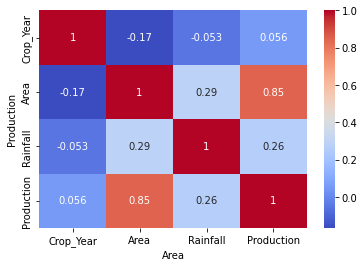

In [23]:
# cocnut production vs Season
coconut_df.groupby('Season')['Production'].sum().nlargest()

sns.heatmap(coconut_df.corr(),annot=True,cmap = "coolwarm" )

sns.scatterplot(data=coconut_df,x='Area',y='Production');

<AxesSubplot: xlabel='District_Name', ylabel='Production'>

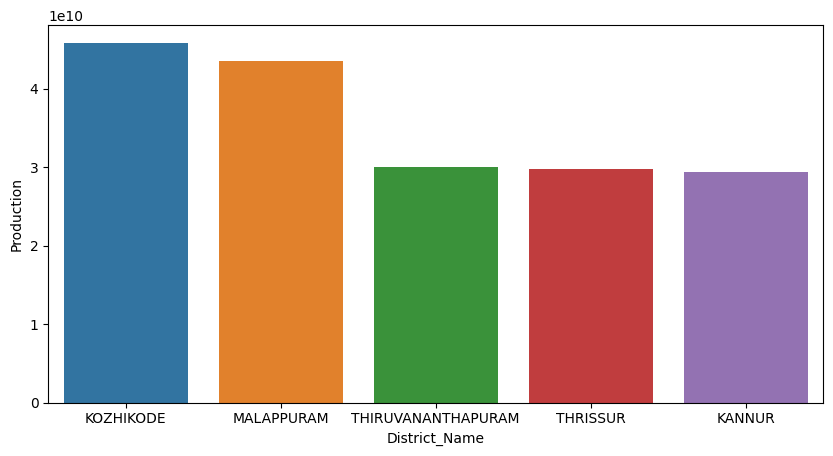

In [24]:
# coconut production in districts 
plt.figure(figsize=(10,5),dpi=100)
sns.barplot(data=coconut_df.groupby('District_Name').sum()['Production'].nlargest().reset_index(),x='District_Name',y='Production')



<AxesSubplot: xlabel='Production', ylabel='State_Name'>

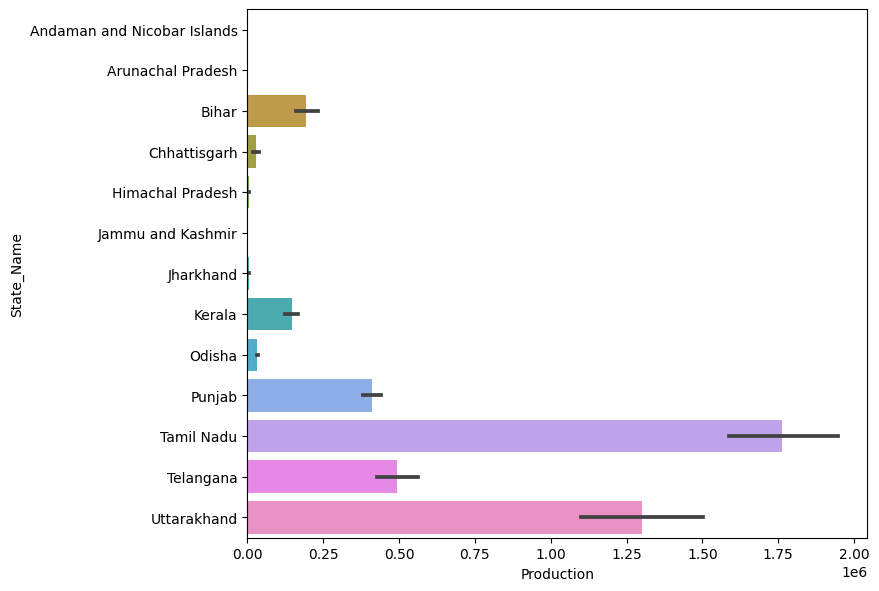

In [25]:
sugar_df = df[df['Crop'] == 'Sugarcane']
# Average Sugar cane production in states
plt.figure(figsize=(8,7),dpi=100)
sns.barplot(data=sugar_df,x='Production',y='State_Name')
            
#sugar_df.groupby('Season')['Production'].sum().nlargest()

,State_Name,Production
0,Punjab,5.391060e+08
1,Odisha,3.598654e+08
2,Tamil Nadu,3.010069e+08
3,Bihar,2.763882e+08
4,Chhattisgarh,2.451347e+08


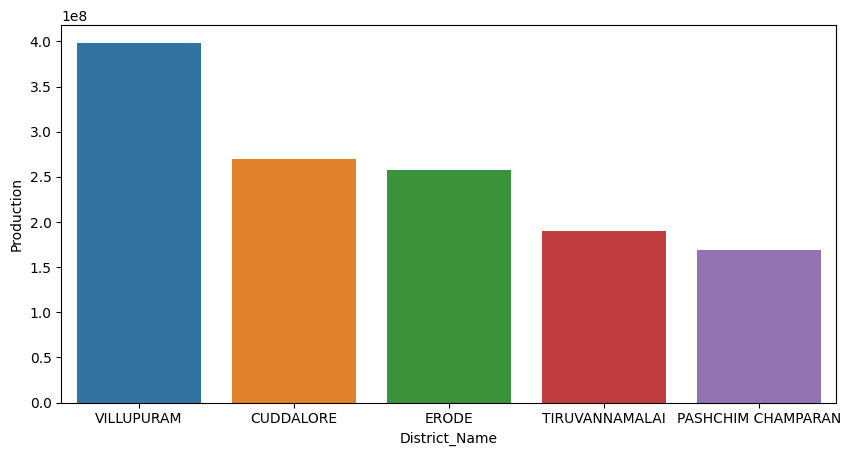

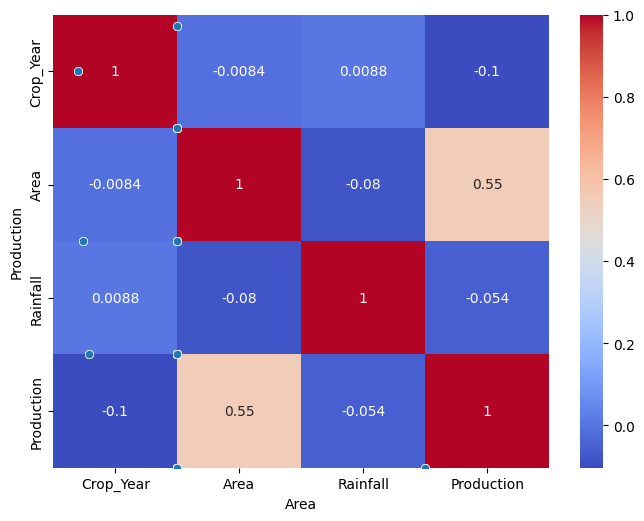

In [26]:
# Sugarcane production in districts 
plt.figure(figsize=(10,5),dpi=100)
sns.barplot(data=sugar_df.groupby('District_Name').sum()['Production'].nlargest().reset_index(),x='District_Name',y='Production')

plt.figure(figsize=(8,6),dpi=100)
sns.lineplot(data=sugar_df,x='Crop_Year',y='Production');

sns.barplot(data=sugar_df,x='Season',y='Production')
sns.heatmap(sugar_df.corr(),annot=True,cmap = "coolwarm" )
sns.scatterplot(data=sugar_df,x='Area',y='Production');

rice_df = df[df['Crop'] == 'Rice']
rice_df.groupby('State_Name').sum()['Production'].nlargest().reset_index()

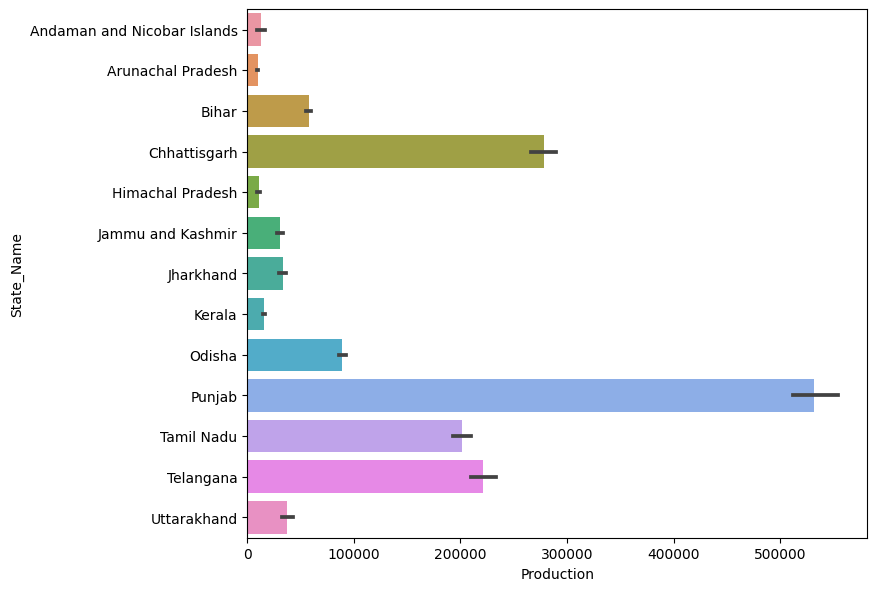

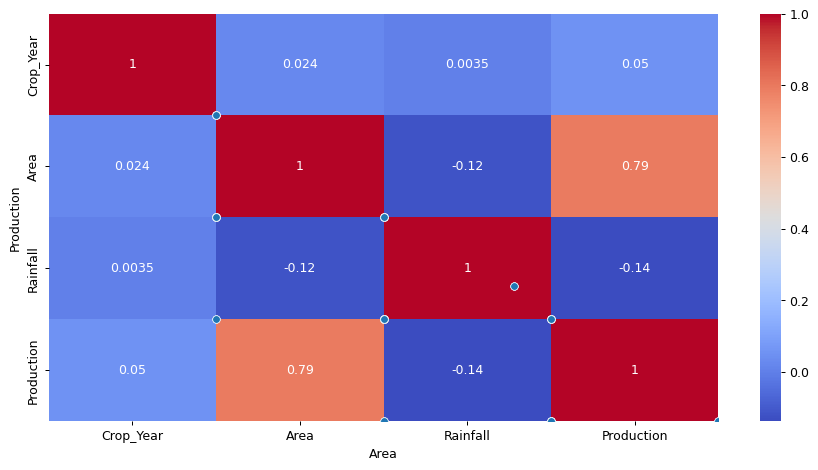

In [27]:
# Average Rice production in states
plt.figure(figsize=(8,7),dpi=100)
sns.barplot(data=rice_df,x='Production',y='State_Name')

plt.figure(figsize=(12,6),dpi=90)
sns.barplot(data=rice_df,x='Crop_Year',y='Production');

sns.barplot(data=rice_df,x='Season',y='Production')
sns.heatmap(rice_df.corr(),annot=True,cmap = "coolwarm" )

sns.scatterplot(data=rice_df,x='Area',y='Production');

In [28]:

north_india = ['Jammu and Kashmir', 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh']
east_india = ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal']
south_india = ['Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu', 'Telangana']
west_india = ['Rajasthan' , 'Gujarat', 'Goa','Maharashtra']
central_india = ['Madhya Pradesh', 'Chhattisgarh']
north_east_india = ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
ut_india = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry']

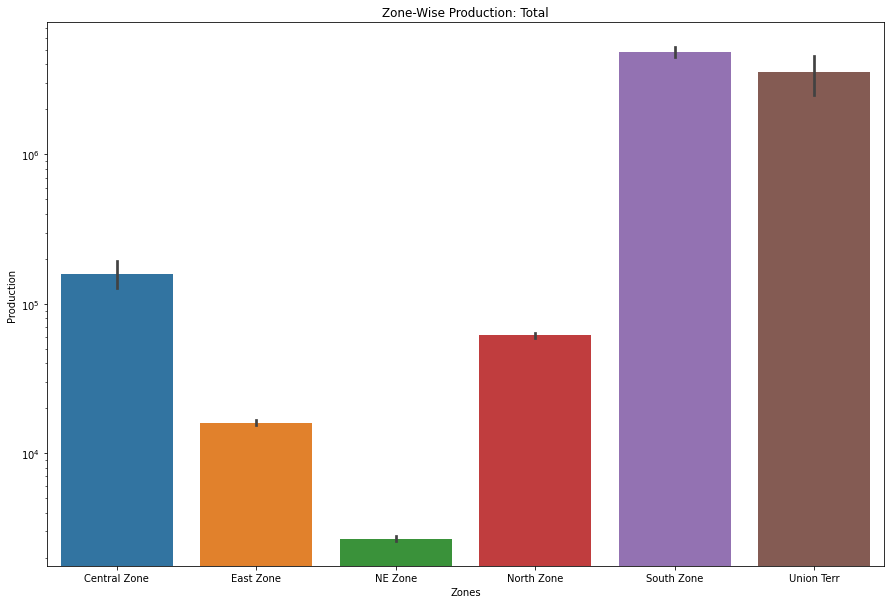

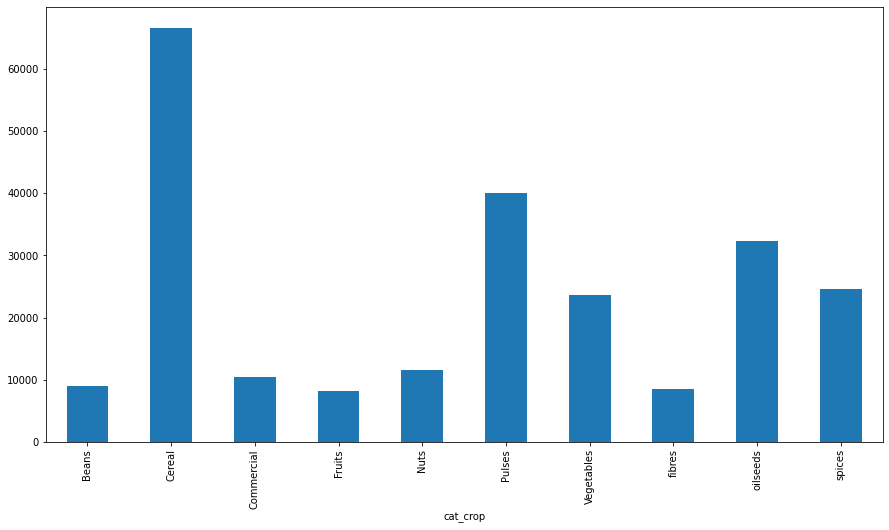

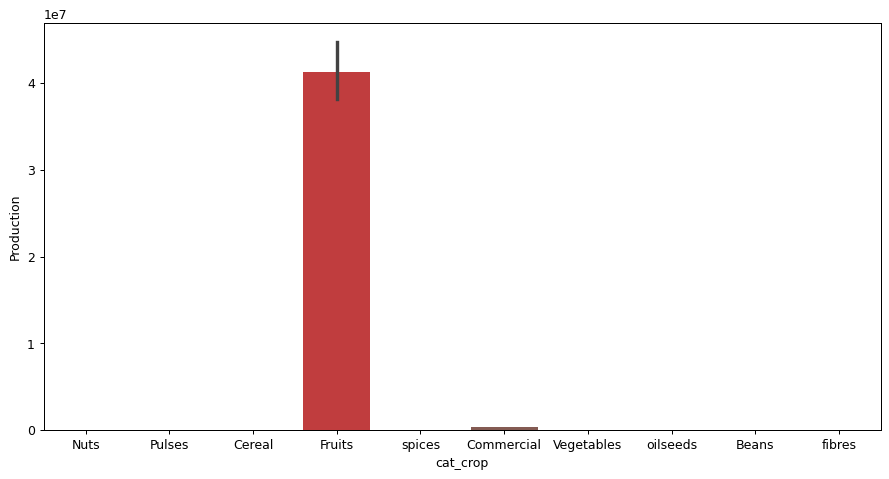

In [29]:

def get_zonal_names(row):
    if row['State_Name'].strip() in north_india:
        val = 'North Zone'
    elif row['State_Name'].strip()  in south_india:
        val = 'South Zone'
    elif row['State_Name'].strip()  in east_india:
        val = 'East Zone'
    elif row['State_Name'].strip()  in west_india:
        val = 'West Zone'
    elif row['State_Name'].strip()  in central_india:
        val = 'Central Zone'
    elif row['State_Name'].strip()  in north_east_india:
        val = 'NE Zone'
    elif row['State_Name'].strip()  in ut_india:
        val = 'Union Terr'
    else:
        val = 'No Value'
    return val

df['Zones'] = df.apply(get_zonal_names, axis=1)
df['Zones'].unique()

df.Zones.value_counts()
ig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=df.Zones.sort_values(ascending=True), y=df.Production)
plt.yscale('log')
plt.title('Zone-Wise Production: Total')


crop=df['Crop']
def cat_crop(crop):
    for i in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar', 'Paddy','Total foodgrain','Jobster']:
        if crop==i:
            return 'Cereal'
    for i in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total','Gram']:
        if crop==i:
            return 'Pulses'
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        if crop==i:
            return 'Fruits'
    for i in ['Bean','Lab-Lab','Moth','Guar seed','Soyabean','Horse-gram']:
        if crop==i:
            return 'Beans'
    for i in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion','Tapioca','Colocosia']:
              if crop==i:
                return 'Vegetables'
    for i in ['Perilla','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies','Cond-spcs other']:
        if crop==i:
            return 'spices'
    for i in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)','Sannhamp']:
        if crop==i:
            return 'fibres'
    for i in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        if crop==i:
            return 'Nuts'
    for i in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum','Oilseeds total']:
        if crop==i:
            return 'oilseeds'
    for i in ['Tobacco','Coffee','Tea','Sugarcane','Rubber']:
        if crop==i:
            return 'Commercial'


df['cat_crop']=df['Crop'].apply(cat_crop)
df["cat_crop"].value_counts()
plt.figure(figsize=(15, 8))
plt.tick_params(labelsize=10)
df.groupby("cat_crop")["Production"].agg("count").plot.bar()
plt.show()

plt.figure(figsize=(12,6),dpi=90)
sns.barplot(data=df,x='cat_crop',y='Production');

In [30]:
cultivation_data = df[["State_Name","District_Name","Crop_Year","Season","Rainfall","Crop","Area","Production"]]
cultivation_data.head()

cultivation_data = pd.get_dummies(cultivation_data)
x = cultivation_data.drop("Production",axis=1)
y = cultivation_data[["Production"]]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)


Predictions=y_test.copy()

models = []

models.append(('rf_reg', RandomForestRegressor(n_estimators=10,random_state=42)))
models.append(('grad_reg', GradientBoostingRegressor()))
print(models)

# evaluate each model in turn
results = []
names=[]
RMSE=[]

np.isnan(y_train.all())

x_train.fillna(0,inplace=True)
y_train.fillna(0,inplace=True)
x_test.fillna(0,inplace=True)
y_test.fillna(0,inplace=True)

x_train : (165380, 377)
x_test : (81457, 377)
y_train : (165380, 1)
y_test : (81457, 1)
[('rf_reg', RandomForestRegressor(n_estimators=10, random_state=42)), ('grad_reg', GradientBoostingRegressor())]


In [ ]:
for name,model in models:
    bla=model.fit(x_train, y_train)
    #print(f"%s === "%model)
    kfold = KFold(n_splits=10, random_state=1, shuffle=True)
    kf_cv_scores = cross_val_score(model, x_train, y_train, cv=kfold)
    for i in range (len(kf_cv_scores)):
        print(f"%s {[i]} Accuracy :  {kf_cv_scores[i]}"% model)
    
    print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
    results.append(kf_cv_scores)
    names.append(name)
    ypred = model.predict(x_test)
    Predictions[name]=ypred
    mse = mean_squared_error(y_test,ypred)
    print("MSE: %.2f" % mse)
    print("RMSE: %.2f" % np.sqrt(mse))
    RMSE.append(np.sqrt(mse))
    
    msg = "%s: %f (%f)" % (model, kf_cv_scores.mean(), kf_cv_scores.std())
    print(msg)
    print("============================================")
    print("============================================")
    print("============================================")
    

Predictions.head()
Predictions.sort_values('Production').tail(10)

In [ ]:
Predictions.plot(kind='scatter', x='Production', y='rf_reg', color='r')
plt.title("Random Forest")
Predictions.plot(kind='scatter', x='Production', y='grad_reg', color='g')
plt.title("Gradient Boosting")
plt.show()

In [ ]:

for i in range(5):
    print(f"{models[i][0]}  : {results[i].mean()}")

In [ ]:
fig = plt.figure()
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:

for name, model in models:
    MSE = np.square(np.subtract(Predictions.Production,Predictions[name])).mean()
    rmse =np.sqrt(MSE)
    print(f"{name}    : {rmse}")

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

for name, model in models:
    r2score=r2_score(Predictions.Production,Predictions[name])
    print(f"{name}    : {r2score}")